   # Task-2 :Explore Supervised Machine Learning with Student's scores Dataset
   # Rutvik Patel

# 1.Linear Regression From Scratch

### Importing Python Libraaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import webbrowser
%matplotlib notebook

### Importinng Dataset 

In [4]:
url="http://bit.ly/w-data"  #data in CSV format
data_frame=pd.read_csv(url)
data_frame

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Plotting given dataset in Graph

In [5]:
xaxis_value=data_frame["Hours"]  
yaxis_value=data_frame["Scores"]

<IPython.core.display.Javascript object>


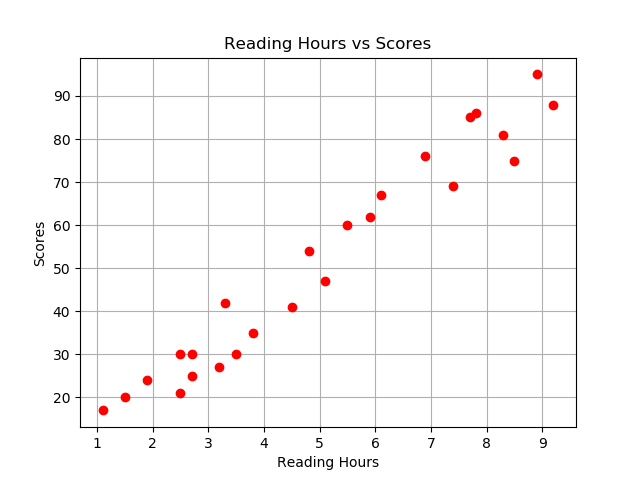

In [6]:
plt.title("Reading Hours vs Scores")
plt.xlabel("Reading Hours")
plt.ylabel("Scores")
plt.grid(True)
plt.plot(xaxis_value,yaxis_value,"ro",label="Data")
plt.show()

### Training Data X and y 

In [7]:
X=np.array(data_frame['Hours']).reshape(-1,1)

y=np.array(data_frame['Scores']).reshape(-1,1)

### Linear Regression Model

Initializing parameter theta, with is going to the slope of prediction line and c ,interccept.

cost function (J); Root Mean Squared Error between predicted y value (pred) and true y value (y).

Gradient desent ;in order to reduce Cost function minimizing cost function and achieving the best fit line the model uses Gradient Descent

In [9]:
#here n is number of features (in this case n=1)
n=1
#alpha is the learning rate of regression model
alpha=0.05

iterations=200
theta=np.zeros((1,n)) #theta

c=np.zeros((1,1)) #intercept

m=len(X)
list=[] 

#the value of H : h(x)= theta*X + c (prediction line)
def valueofh(theta,c,X):
    h=np.dot(X,theta.T) + c
    return h

#the cost function.
def computecost(theta,X,y,c):
    h=valueofh(theta,c,X)
    tmp=np.power((h-y),2)
    j=np.sum(tmp)/(m*2)
  
    return j

def gradientdesent(theta,alpha,iterations,c):
    for i in range(iterations):
        h=valueofh(theta,c,X)
        theta = theta - alpha*(np.dot(X.T,h-y)/m)
        c = c - alpha*(sum(h-y)/m)
        cost_function=computecost(theta,X,y,c)
        list.append(cost_function)
        
    return (c,theta,cost_function)

intercept,thetavalue,cost=gradientdesent(theta,alpha,iterations,c)


<IPython.core.display.Javascript object>


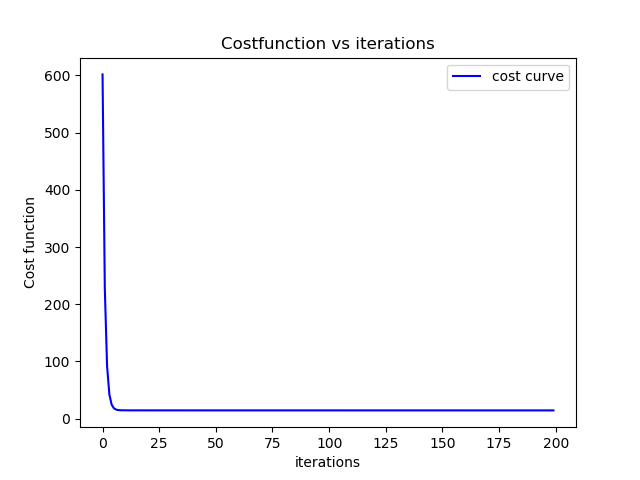

In [13]:
plt.title("Costfunction vs iterations")
plt.xlabel("iterations")
plt.ylabel("Cost function")

plt.plot(range(iterations),list,"b-",label="cost curve")
plt.legend()
plt.show()

### The values after Regression Model 

In [14]:
print("Theta = ",thetavalue)
print("Intercept = ",intercept)
print("Minimized Cost function value = ",cost)

Theta =  [[9.796713]]
Intercept =  [[2.35413469]]
Minimized Cost function value =  14.443009381122998


# 2.Implementation with sklearn library

### Importing relevent libraries 

In [15]:
from sklearn.linear_model import LinearRegression

### Training Dataset X and y 

In [16]:
X=np.array(data_frame['Hours']).reshape(-1,1)

y=np.array(data_frame['Scores']).reshape(-1,1)

### Training linear regression model 

In [19]:
linreg = LinearRegression().fit(X,y)

In [20]:
print("theta :",linreg.coef_)
print("intercept:",linreg.intercept_)
print("accuracy:",linreg.score(X,y))

theta : [[9.77580339]]
intercept: [2.48367341]
accuracy: 0.9529481969048356


### Data representation with Prediction Line 

line : y = theta*X + c

<IPython.core.display.Javascript object>


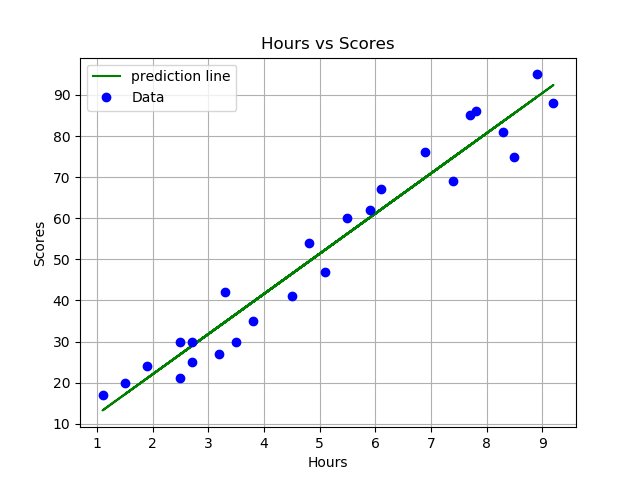

In [21]:
theta = linreg.coef_
c = linreg.intercept_
y = np.dot(X,theta)+c

plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid(True)
plt.plot(X,np.dot(X,theta)+c,'g-',label='prediction line')
plt.plot(xaxis_value,yaxis_value,"bo",label="Data")
plt.legend()

### Final Result 

In [22]:
final_result=valueofh(theta,c,np.array([9.25]))[0]
print("The Final Score predicted with the study of 9.25 hr is :",final_result)

The Final Score predicted with the study of 9.25 hr is : 92.90985477015731


### Note: As observed there is two ways to implement liinear regression model , in both the case result will be the same. 